# Importing the needed libraries

In [ ]:
!pip install -U scikit-learn

In [ ]:
#import needed libraries (pandas , numpy , seaborn, matplotlib , sklearn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


my notes: pair plot for visualization
KNN the k must be an odd number

In [ ]:
# import iris dataset
df = pd.read_csv('/content/iris_csv.csv')
# print(type(df))

In [ ]:
# Show the dataset infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           150 non-null    int64  
 1   sepallength  150 non-null    float64
 2   sepalwidth   150 non-null    float64
 3   petallength  150 non-null    float64
 4   petalwidth   150 non-null    float64
 5   class        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Show head of dataset
df.head()

,id,sepallength,sepalwidth,petallength,petalwidth,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Describe the dataset
df.describe()

,id,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#check the samples for each class / is it balanced dataset
df['class'].value_counts()
# since all classes have the same no of samples -> balanced

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [ ]:
#check for missing data
df.isnull()
# if false-> no missing data

,id,sepallength,sepalwidth,petallength,petalwidth,class
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
#check duplicates
df.duplicated().sum()

0

In [ ]:
#drop duplicates
df.drop_duplicates()
#test after remove the duplicates
df.duplicated().sum()

0

## Split into X and Y

In [ ]:
##select all rows and all columns except the last one.
x = df.iloc[:,:-1]
##select all rows, but only the last column.
y = df.iloc[:,-1]
print(y)
x

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


,id,sepallength,sepalwidth,petallength,petalwidth
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3


In [ ]:
#check the X head
x.head()

,id,sepallength,sepalwidth,petallength,petalwidth
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [ ]:
#check the y head
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

## Split into training and testing

In [ ]:
#split the data into train and test sets (80,20):
# df = df.sample(frac = 1)


# x_train, y_train, x_test, y_test = train_test_split(x, y, test_size= 0.2, train_size= 0.8, random_state=None, shuffle=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, train_size= 0.8, random_state=None, shuffle=True)



trainOfX = np.asarray(x_train)
trainOfY = np.asarray(y_train)

testOfX = np.asarray(x_test)
testOfY = np.asarray(y_test)

x_train # making sure that it is shuffled
# testOfY

,id,sepallength,sepalwidth,petallength,petalwidth
61,61,5.9,3.0,4.2,1.5
137,137,6.4,3.1,5.5,1.8
99,99,5.7,2.8,4.1,1.3
83,83,6.0,2.7,5.1,1.6
48,48,5.3,3.7,1.5,0.2
...,...,...,...,...,...
129,129,7.2,3.0,5.8,1.6
7,7,5.0,3.4,1.5,0.2
81,81,5.5,2.4,3.7,1.0
66,66,5.6,3.0,4.5,1.5


In [ ]:
#check the traing set size and test set size:
print(testOfX.size, testOfY.size, trainOfX.size, trainOfY.size)

150 30 600 120


## Normalize the dataset

In [ ]:
#the scaler is fitted to the training set / the Normalizer calculates the normalization parameters based on the training set.
scaler = StandardScaler()

#the scaler is applied to the training set / this step scales each feature in the training set independently.
x_train_normalized = scaler.fit_transform(x_train)

##the scaler is applied to the test set
x_test_normalized = scaler.transform(x_test)


In [ ]:
# #  The standardization method not normalization
# x_train_normalized = (x - x_train.mean()) / x_train.std()
# x_train_normalized

In [ ]:
# x_test_normalized = (x - x_train.mean()) / x_train.std()
# x_test_normalized

In [ ]:
print("X train before Normalization")
print(x_train[:5])
# print(x_train.head())

print("\nX train after Normalization")
print(x_train_normalized[:5])
# print(x_train_normalized.head())

X train before Normalization
      id  sepallength  sepalwidth  petallength  petalwidth
61    61          5.9         3.0          4.2         1.5
137  137          6.4         3.1          5.5         1.8
99    99          5.7         2.8          4.1         1.3
83    83          6.0         2.7          5.1         1.6
48    48          5.3         3.7          1.5         0.2

X train after Normalization
[[-0.27245266  0.13656698 -0.12389271  0.3030538   0.45420927]
 [ 1.4835673   0.76687611  0.10483229  1.05706325  0.85400227]
 [ 0.60555732 -0.11555667 -0.58134271  0.24505307  0.1876806 ]
 [ 0.23586891  0.26262881 -0.81006771  0.82506034  0.5874736 ]
 [-0.57282449 -0.61980398  1.4771823  -1.26296583 -1.27822706]]


In [ ]:
print("X test before Normalization")
print(x_test[:5])
# print(x_test.head())

print("\nX test after Normalization")
print(x_test_normalized[:5])
# print(x_test_normalized.head())

X test before Normalization
      id  sepallength  sepalwidth  petallength  petalwidth
4      4          5.0         3.6          1.4         0.2
136  136          6.3         3.4          5.6         2.4
40    40          5.0         3.5          1.3         0.3
15    15          5.7         4.4          1.5         0.4
108  108          6.7         2.5          5.8         1.8

X test after Normalization
[[-1.58946763 -0.99798946  1.2484573  -1.32096656 -1.27822706]
 [ 1.46046177  0.64081428  0.79100729  1.11506398  1.65358827]
 [-0.7576687  -0.99798946  1.0197323  -1.37896728 -1.14496273]
 [-1.33530684 -0.11555667  3.0782573  -1.26296583 -1.0116984 ]
 [ 0.81350705  1.14506159 -1.26751771  1.23106543  0.85400227]]


## Visualize the dataset before and after normalization

Text(0.5, 1.08, 'Pair Plot of the dataset before normalization')

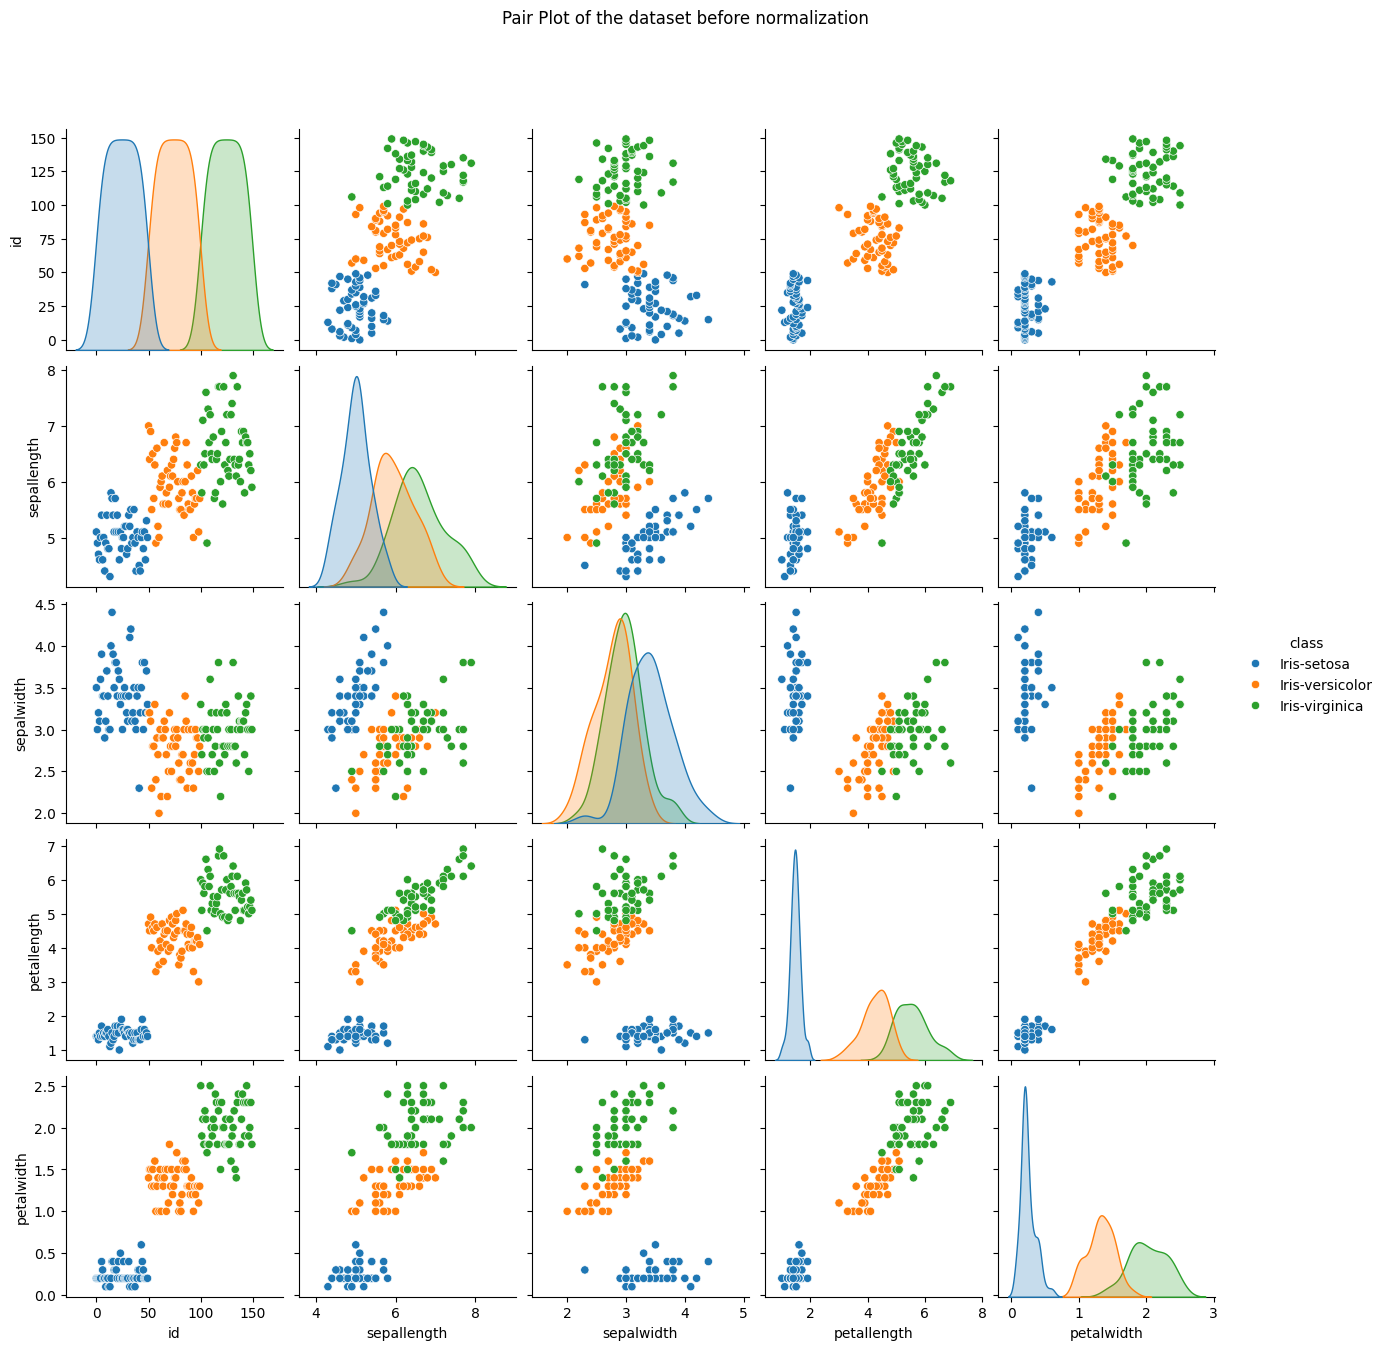

In [ ]:
before = sns.pairplot(df, hue='class')

before.fig.suptitle("Pair Plot of the dataset before normalization", y=1.08)

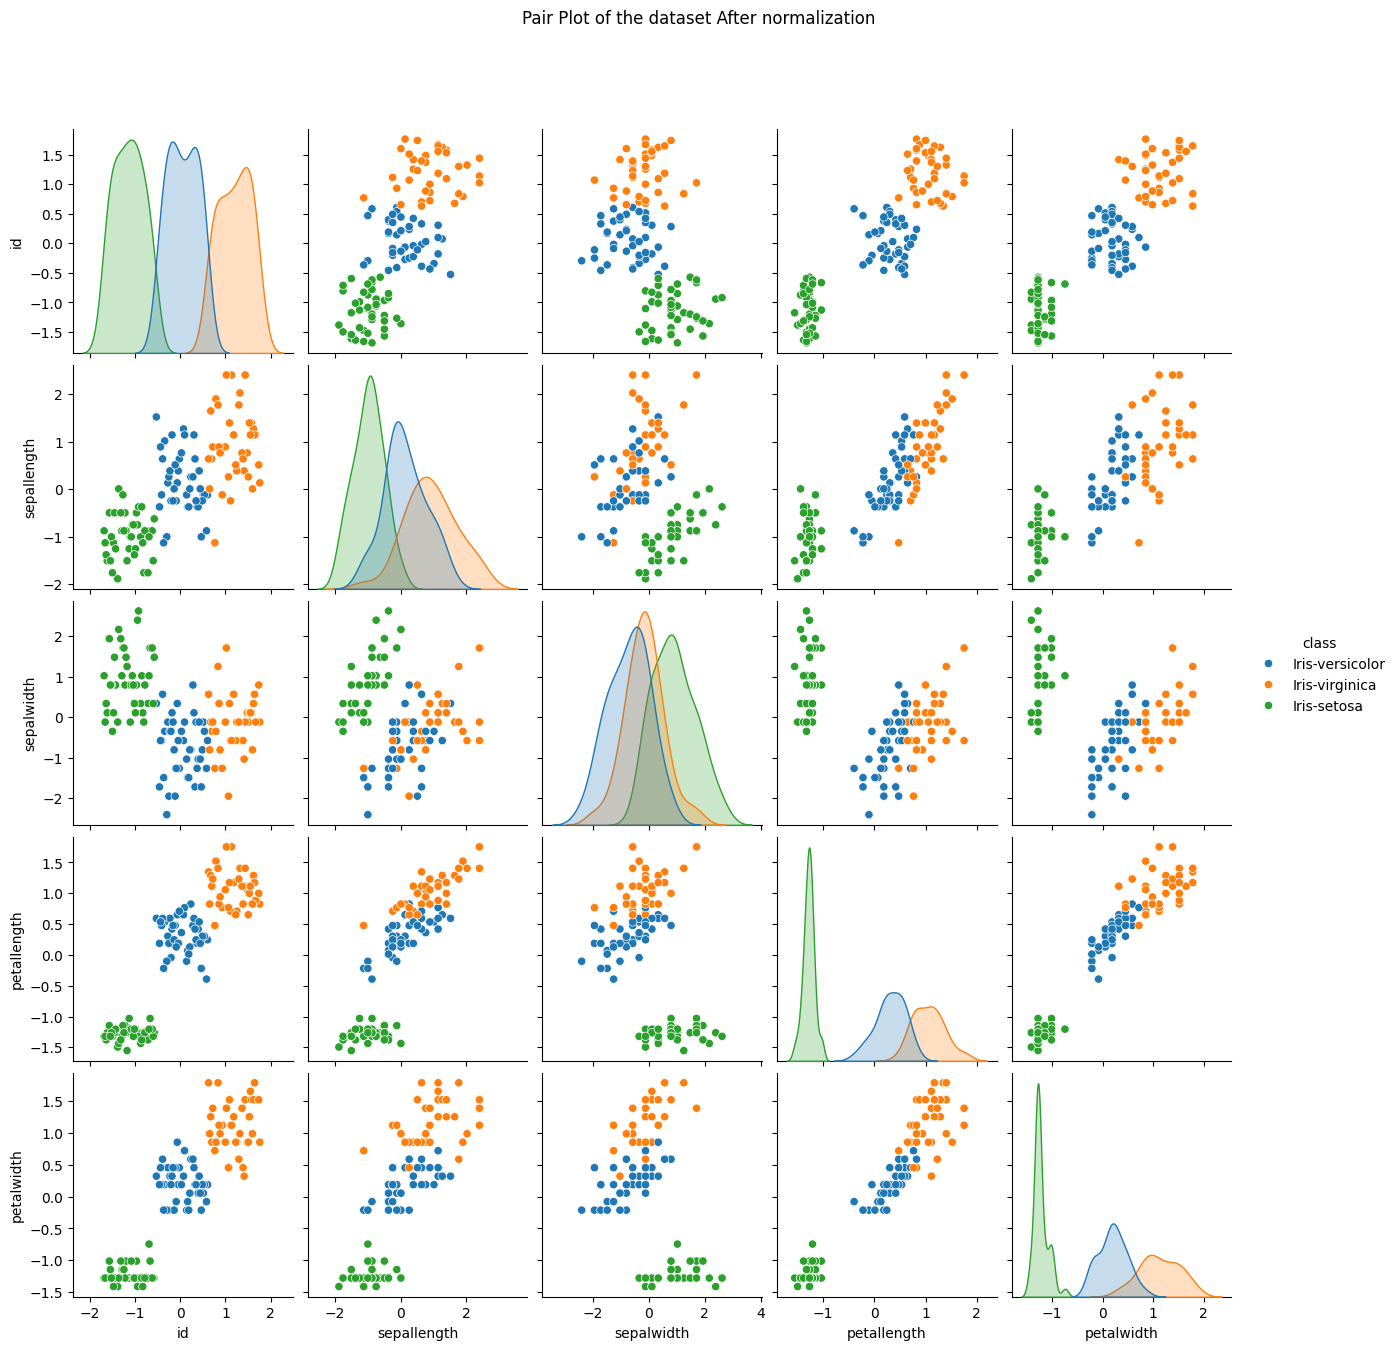

In [ ]:
# Pair plot of the dataset after normalization
after = sns.pairplot(pd.concat([pd.DataFrame(x_train_normalized, columns=x_train.columns), pd.DataFrame({'class': trainOfY})], axis=1), hue='class')
after.fig.suptitle("Pair Plot of the dataset After normalization", y=1.08)
plt.show()

<ipython-input-89-5bd61da3c41f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


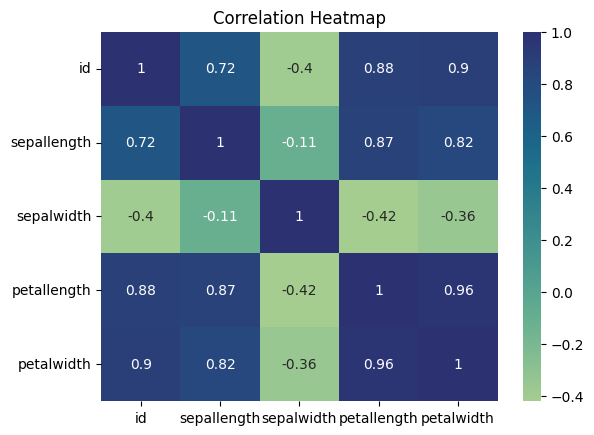

In [ ]:
#visualize heatmap for different features before normalise :
#check correlation
#correlation heatmap

sns.heatmap(df.corr(), annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

# Implemenet KNN from scratch

## KNN Algorithm steps

1. Calculate the distances between all the training data and the test point.


2. Find the nearest K neighbors by sorting these pairwise distances.


3. Classify the point based on a majority vote.

### Step 1 ( Calculate the distance using Eculidean distance)

In [ ]:
def eculidean_distance( x_train_normalized, x_test_point ):

    distances = []
    for i in range(len(x_train)):

        current_train_point =  x_train_normalized[i]

        current_distance = 0

        for j in range(len(x_test_point)):

            current_distance += (current_train_point[j] - x_test_point[j]) ** 2

        current_distance = np.sqrt(current_distance)

        distances.append(current_distance)

    # make a df of distances :
    distances = pd.DataFrame(data=distances, columns=['distance'])
    return distances

### Step 2 ( Find the nearest neighbors )

In [ ]:
def nearest_neighbors(distance_point, k):
    df_nearest = distance_point.sort_values(by='distance').head(k)
    return df_nearest.index

### Step 3 ( Classify the point based on a majority vote )

In [ ]:
# df_nearest: Dataframe contains the nearest K neighbors between the Full training dataset and the test point

def voting(df_nearest , y_train):

    ## Use the Counter Object  It counts the occurrences of each class label in the df
    counter_vote = Counter(y_train[df_nearest])

    ## Majority Voting :
    y_pred = counter_vote.most_common(1)[0][0]
    # the method lists the n most common elements and their counts from the most common to the least,
    #  I accessed the element 0 since we need the highest

    return y_pred

In [ ]:
# # was testing sth here:
# print("x_train_normalized ", x_train_normalized.shape)
# print("x_test_normalized :", x_test_normalized.shape)

## KNN Full Algorithm : Putting Everything Together

In [ ]:
def KNN_from_scratch(x_train_normalized, y_train, x_test, k):
  y_pred = []
  for test in range(len(x_test_normalized)):
          distances = eculidean_distance(x_train_normalized, x_test_normalized[test])
          dfOfdistances = pd.DataFrame({'distance': distances['distance'], 'class': y_train})
          nearest_indices = nearest_neighbors(dfOfdistances, k)
          y_pred.append(voting(nearest_indices, y_train))

  return y_pred

## Test the KNN Algorithm on the test dataset

In [ ]:
#test at k = 3
y_pred_scratch = KNN_from_scratch(x_train_normalized, trainOfY, x_test_normalized, 3)

print(y_pred_scratch)

['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']


## Compare our implementation with the Sklearn library

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_normalized, trainOfY)

y_pred_sklearn = knn.predict(x_test_normalized)
print(y_pred_sklearn)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


### Check if the output is exactly the same

In [ ]:
print(np.array_equal(y_pred_scratch, y_pred_sklearn))

True


### Calculate the accuracy of both methods

In [ ]:
print(f'The accuracy of my implementation :{accuracy_score(testOfY, y_pred_scratch)*100}%')
print(f'The accuracy of sklearn :{accuracy_score(testOfY, y_pred_sklearn)*100}%')

The accuracy of my implementation :100.0%
The accuracy of sklearn :100.0%


In [ ]:
#test at k = 5
y_pred_scratch = KNN_from_scratch(x_train_normalized, trainOfY, x_test_normalized, 5)

print(y_pred_scratch)

['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']


In [ ]:
#test at k = 7
y_pred_scratch = KNN_from_scratch(x_train_normalized, trainOfY, x_test_normalized, 7)

print(y_pred_scratch)

['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor']


In [ ]:
# def eculidean_distance(x_train_normalized, x_test_point):
#     distances = []
#     for i in range(len(x_train_normalized)):
#         current_train_point = x_train_normalized[i]
#         current_distance = np.sqrt(np.sum((current_train_point - x_test_point) ** 2))
#         distances.append(current_distance)
#     distances = pd.DataFrame(data=distances, columns=['distance'])
#     return distances




# def KNN_from_scratch(x_train_normalized, y_train, x_test_normalized, k):
#     y_pred = []
#     for t in range(len(x_test_normalized)):
#         distances = eculidean_distance(x_train_normalized, x_test_normalized[t])
#         dfOfdistances = pd.DataFrame({'distance': distances['distance'], 'class': y_train})
#         nearest_indices = nearest_neighbors(dfOfdistances, k)
#         y_pred.append(voting(nearest_indices, y_train))
#     return y_pred

